## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/Users/Alex/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


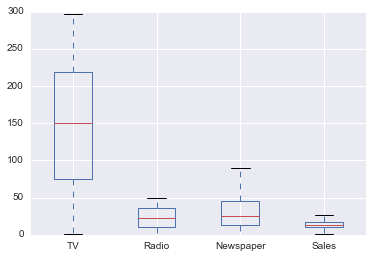

In [2]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

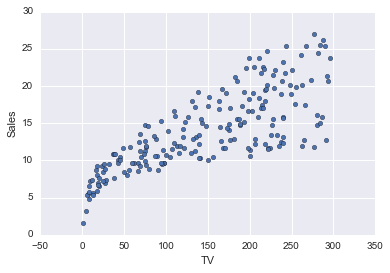

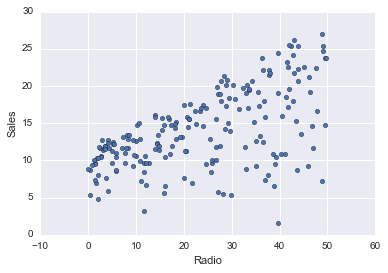

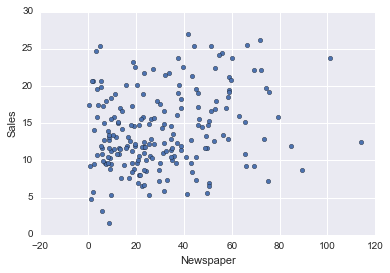

In [3]:
df.plot.scatter(x='TV', y='Sales')
df.plot.scatter(x='Radio', y='Sales')
df.plot.scatter(x='Newspaper', y='Sales')

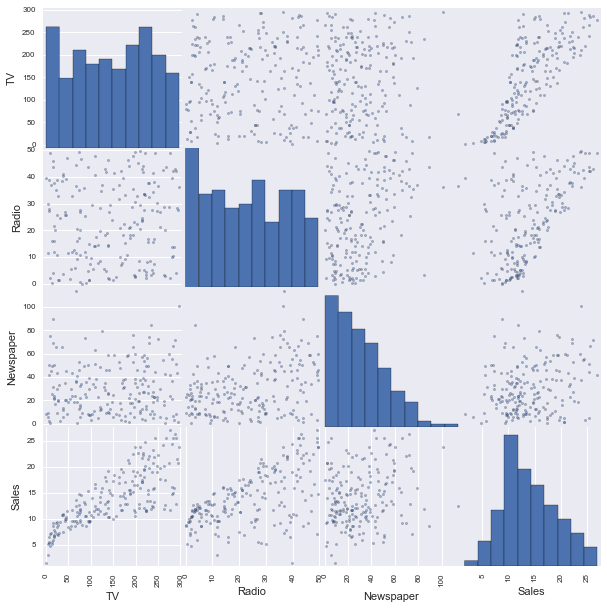

In [4]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, figsize=(10,10))
plt.figure()

Which of the variables seem correlated with one another? Which don't? Explain your answer

**Answer**

The variables that appear most correlated are TV and Sales. The next most correlated are Radio and Sales. The variable that seems to show no meaningful correlation to Sales is Newspaper.

### Problem 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evaluate performance. 

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

a) Set y to be the sales in df

In [6]:
y = df['Sales']

b) Set X to be just the features described above in df

In [7]:
X = df[['TV','Radio','Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [8]:
size = df.shape[0] # Number of rows in data frame (200)

# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [9]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets to make predictions 
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the $R^2$ on the testing data. Is this good? Bad? Why?

In [10]:
# The coefficients obtained by training the model
print 'Coefficients: \n', regr.coef_

# The mean square error
print "Residual sum of squares: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2)

# Explained variance score: 1 is perfect prediction
print 'Variance score: %.2f' % regr.score(X_test, y_test)

Coefficients: 
[ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79
Variance score: 0.90


**Answer**

The $R^2$ measure is $0.90$ which indicates that we have a good model. Specifically, this means that the linear model we obtained in part d) from training our model explains $90\%$ of the variability of the dependent variable around its mean. This is a good outcome because we ideally want $R^2$ to be as close as possible to $1.0$ since this value indicates that the model perfectly predicts the value of the dependent variable.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

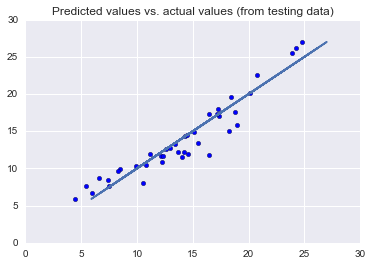

In [11]:
plt.title('Predicted values vs. actual values (from testing data)')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

**Answer**

The scatter plot indicates that we have a good model since we see a clear linear relationship between the predicted values from our linear model and the actual values obtained from our testing data holdout. Said another way, we see that there is not much variability around the blue least squares fit line which means that the difference between predicted values and actual values is reasonably small.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [12]:
# The coefficients obtained by training the model without z-scoring
print 'Coefficients before z-scoring: \n', regr.coef_

#######################################################################

from scipy.stats import zscore

# Z-score the features in the model 
df_zscore = df.apply(zscore)

X_zscore = df_zscore[['TV','Radio','Newspaper']]
y_zscore = df_zscore['Sales']

size_zscore = df_zscore.shape[0]

# Split the data into training/testing sets
X_train_zscore = X_zscore[0:int(size_zscore*0.8)]
X_test_zscore = X_zscore[int(size_zscore*0.8):]

# Split the targets into training/testing sets
y_train_zscore = y_zscore[0:int(size_zscore*0.8)]
y_test_zscore = y_zscore[int(size_zscore*0.8):]

# Create linear regression object
regr_zscore = LinearRegression()

# Train the model using the training sets to make predictions 
regr_zscore.fit(X_train_zscore, y_train_zscore)

# The coefficients obtained by training the model after z-scoring each feature
print 'Coefficients after z-scoring: \n', regr_zscore.coef_

Coefficients before z-scoring: 
[ 0.0472521   0.179922   -0.00094408]
Coefficients after z-scoring: 
[ 0.77754218  0.51198655 -0.00394075]


**Answer**

Looking at the non z-scored coefficients obtained from the linear model, we see that the middle coefficient $0.179922$ (corresponding to Radio) appears most important as it is largest. However, we can see from the boxplot above that the data related to TV, Radio, and Newspaper have very different ranges. Thus, the coefficients may not be reliable unless the data is standardized before fitting it to a model. In order to standardize the data, we would need to z-score it (i.e., by centering the mean around $0$ and requiring unit variance for each feature). This can be done by converting the data $X$ to $Z = (X - \mu) / \sigma$ where $\mu$ is the mean and $\sigma$ is the standard deviation of that specific feature. After z-scoring the data, we see that the first coefficient $0.77754218$ (corresponding to TV) appears most important.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

**Answer**

See part g) for the full explanation.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 13 Feb 2017   Prob (F-statistic):          6.68e-146
Time:                        22:23:28   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

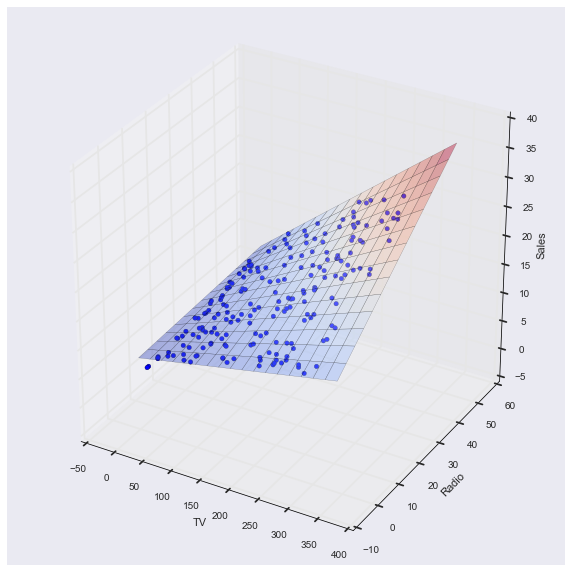

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that Sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * Radio * TV
model = sm.ols(formula='Sales ~ TV * Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Print OLS regression results
print fit.summary()

plt.show()

**Answer**

The above plot shows a scatter plot of the data along with a hyperplane created from a simple OLS regression which also incorporates an interaction term TV $\cdot$ Radio. Specifically, this OLS model is of the form

$$
\text{Sales} = \beta_0 + \beta_1 \cdot \text{TV} + \beta_2 \cdot \text{Radio} + \beta_3 \cdot \text{TV} \cdot \text{Radio}
$$

We can see from the OLS Regression Results that the model with the interaction term improves the performance as the $R^2$ is now $0.968$. In part e), we saw that the regular OLS regression model without the interaction term had an $R^2$ of $0.90$.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


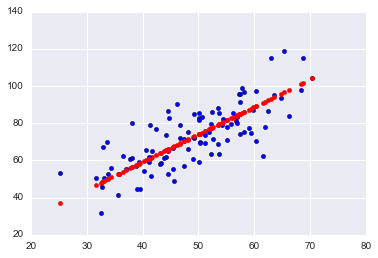

In [38]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100, 0.0001)


Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


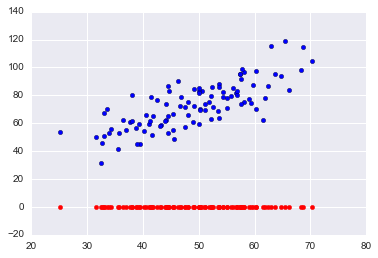

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.00727350505537, m = 0.36853514868, error = 3186.26691833


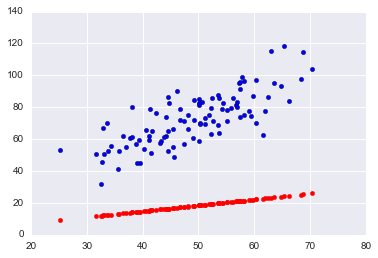

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0127419957953, m = 0.645234012267, error = 1845.28541938


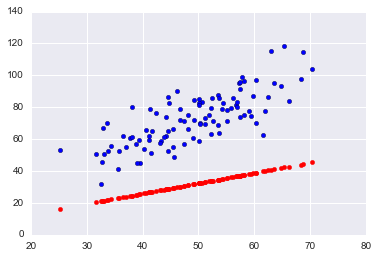

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0168552679415, m = 0.852981490006, error = 1089.35786805


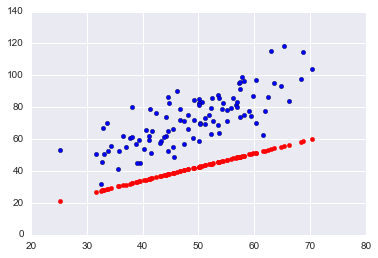

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0199510315653, m = 1.00895973943, error = 663.2323265


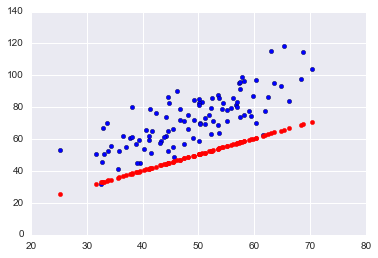

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0222828419731, m = 1.12606925594, error = 423.020179918


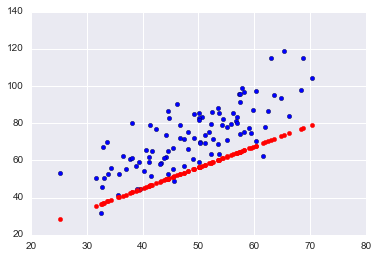

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0240410704301, m = 1.21399583024, error = 287.609670094


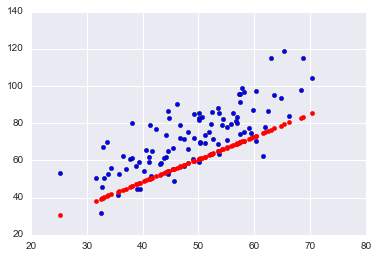

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0253686491395, m = 1.28001162815, error = 211.277114652


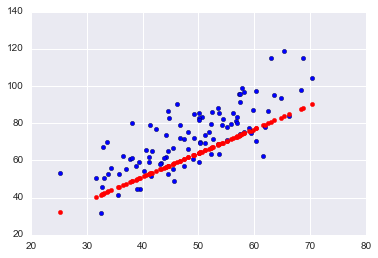

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0263728926934, m = 1.3295766474, error = 168.247518993


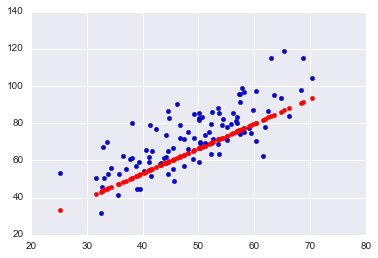

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0271343737092, m = 1.36679029611, error = 143.991205886


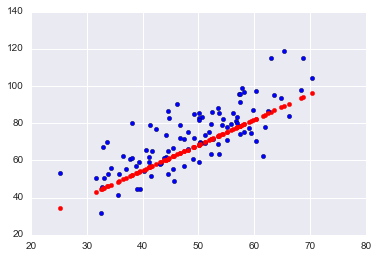

In [29]:
# Case 1: Somewhat Fast Convergence
# learning_rate = 0.00005

for num in range(0, 10):
    run(num, 0.00005)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


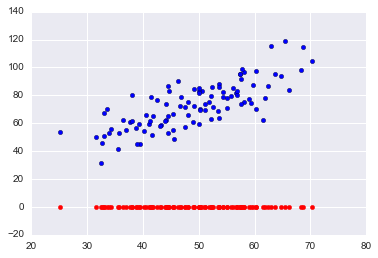

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


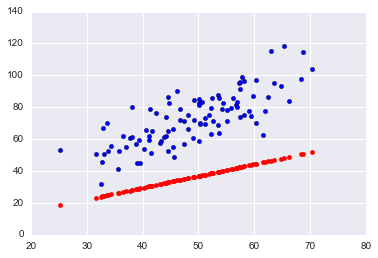

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


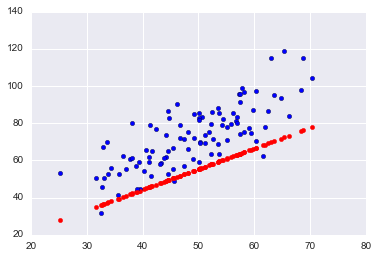

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


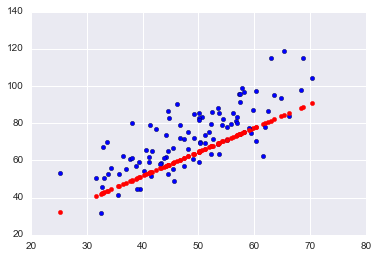

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


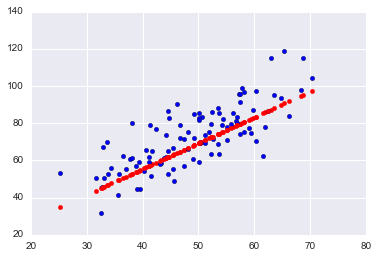

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


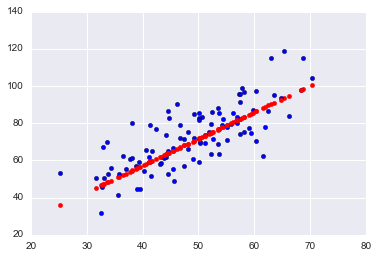

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


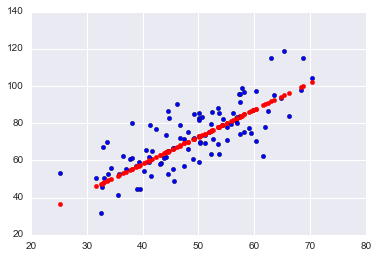

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


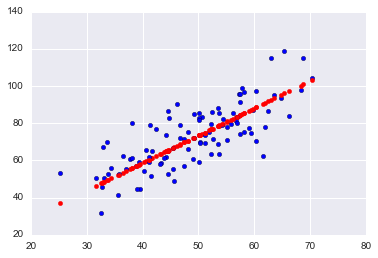

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


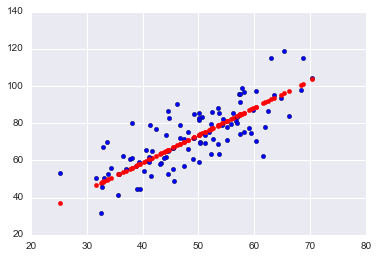

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


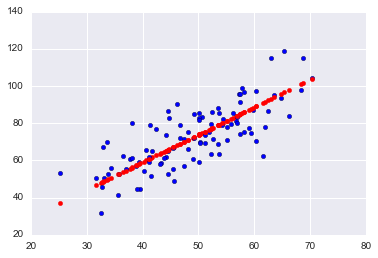

In [22]:
# Case 2: Fast Convergence
# learning_rate = 0.0001
for num in range(0, 10):
    run(num, 0.0001)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


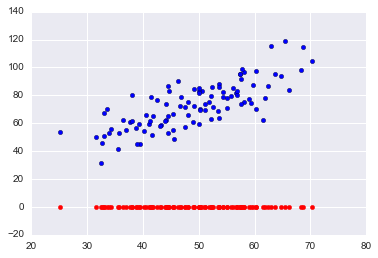

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0581880404429, m = 2.94828118944, error = 5494.87605155


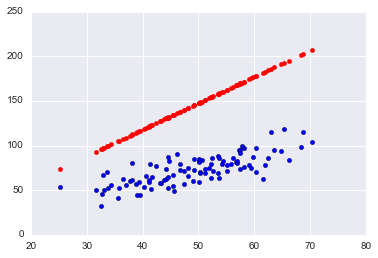

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.000855164695847, m = 0.0190401330057, error = 5425.54890353


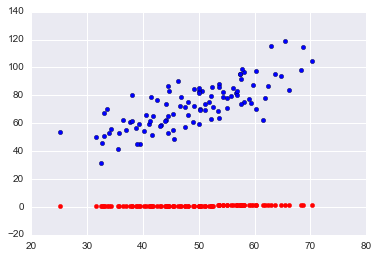

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0582967823405, m = 2.9293452426, error = 5357.11473806


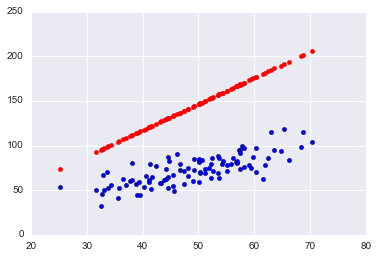

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.00170547764061, m = 0.0378348940251, error = 5289.56205286


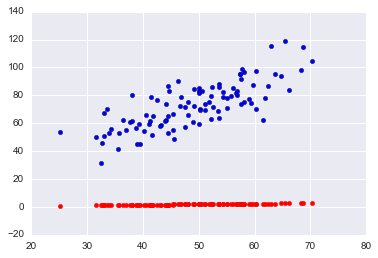

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0584102867728, m = 2.91065308349, error = 5222.87949384


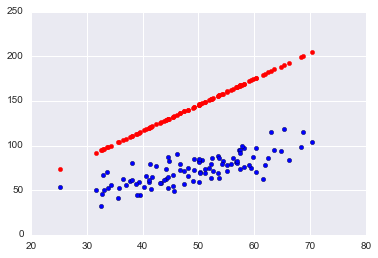

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.00255100095625, m = 0.0563874436363, error = 5157.05585311


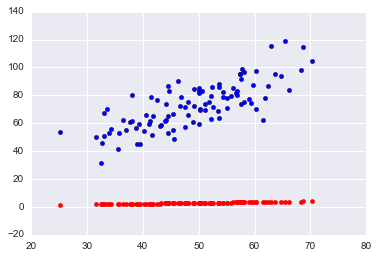

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0585284920227, m = 2.89220157193, error = 5092.0800672


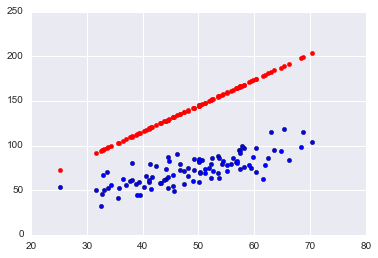

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.00339179596455, m = 0.0747009017066, error = 5027.94121511


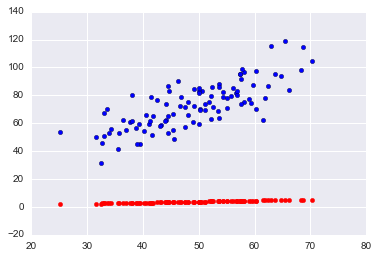

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0586513371681, m = 2.87398760823, error = 4964.62851652


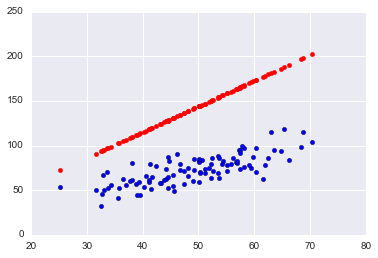

In [17]:
# Case 3: Slow Convergence
# learning_rate = 0.0004
for num in range(0, 10):
    run(num, 0.0004)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


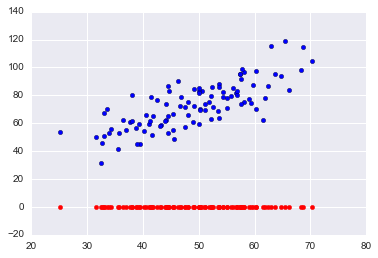

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0727350505537, m = 3.6853514868, error = 12248.9236581


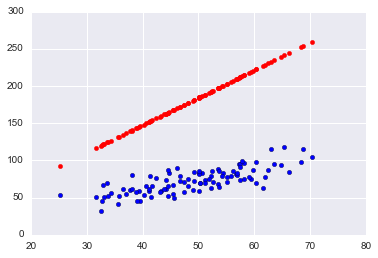

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = -0.0350313304396, m = -1.81292553558, error = 27125.9989615


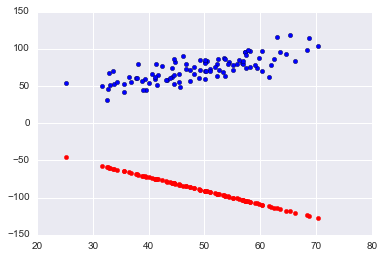

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.12649657886, m = 6.39006817487, error = 60239.9227455


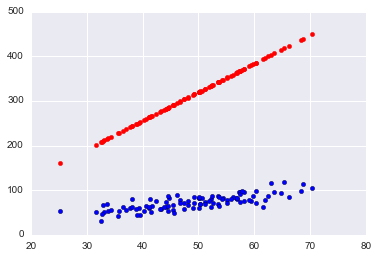

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = -0.113742006833, m = -5.84818522021, error = 133946.072777


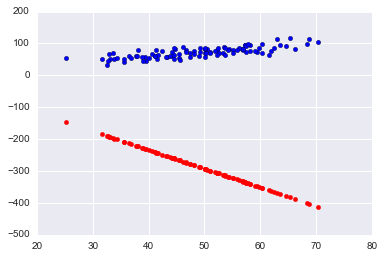

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.245424234669, m = 12.4103372967, error = 298003.844331


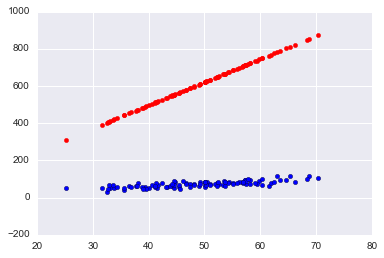

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = -0.289675670037, m = -14.8299953294, error = 663169.469941


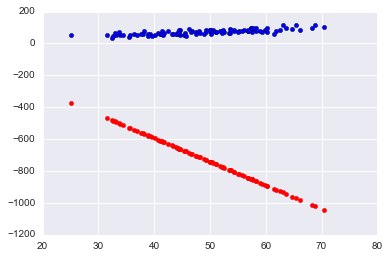

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.509401031399, m = 25.8104809976, error = 1475968.11288


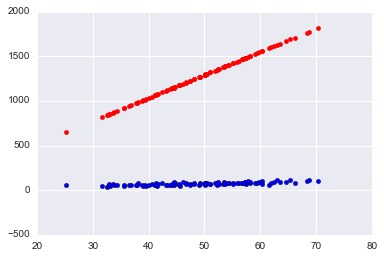

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = -0.682011661046, m = -34.8220133818, error = 3285124.25334


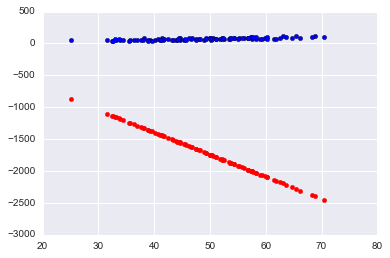

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 1.09623342269, m = 55.6370121244, error = 7312008.36394


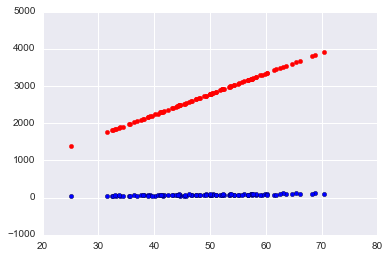

In [18]:
# Case 4: Divergence
# learning_rate = 0.0005
for num in range(0, 10):
    run(num, 0.0005)
    plt.show()

**Answer**

In the four cases above, we show the effects of modifying the learning rate parameter on the convergence or divergence of the gradient descent method. The following table summarizes the results:

$$
\begin{aligned}
&& \text{Learning Rate} && \text{Error after 10 iterations} && \text{Error after 100 iterations} && \text{Absolute Error} \\
\text{Case 1: Somewhat Fast Convergence} && 0.00005 && 143.991205886 && 112.648860998 && 31.342344888 \\
\text{Case 2: Fast Convergence} && 0.0001 && 112.672384359 && 112.647056643 && 0.025327716 \\
\text{Case 3: Slow Convergence} && 0.0004 && 4964.62851652 && 1603.9025065 && 3360.72601002 \\
\text{Case 4: Divergence} && 0.0005 && 7312008.36394 && 3.06126079792 \cdot 10^{38} && 3.06126079792 \cdot 10^{38} \\
\end{aligned}
$$

We see in Case 2 that the learning rate set to $0.0001$ results in the fastest convergence as the absolute error between 10 and 100 iterations is on the order of $10^{-2}$. Case 1, with the smaller learning rate of $0.00005$, results in a less fast convergence since the absolute error is $31.342344888$. Case 3, where the learning rate is $0.0004$, results in a slow convergence as the absolute error is $3360.72601002$. Lastly, Case 4, where the learning rate is $0.0005$, shows divergence from the solution as the error increases with each additional iteration. Thus, we infer that the optimal learning rate is closer to $0.0001$.

Firstly, we note that the learning rate determines the time step size that the gradient descent method uses to minimize (at least locally) a given convex function. The role of the learning rate $\kappa$ can be seen in the following equation:

$\beta_{n} = \beta_{n-1} - \kappa \nabla_{\beta} \mathcal{L}(\beta_{n-1})$.

Here, we note that the learning rate $\kappa$ serves as a weighting mechanism to fine tune how much emphasis we want to place on the gradient of the cost function. If $\kappa$ is small, then the difference between $\beta_{n-1}$ and $\beta_{n}$ will also be small, leading to a larger number of steps (i.e., larger $n$) in order to find an acceptable minimum $\beta^*$. Thus, choosing $\kappa$ to be too small can result in a very slow solution. On the other hand, we must be careful to choose $\kappa$ such that it is not too large, otherwise we may take step sizes so large that we bypass the minimum altogether, leading to a divergent solution.